# Rough draft

In [371]:
#Setting up environment with initial libraries needed for importing, cleaning, and initial visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Bring in Libraries for modeling and statisitics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

import os

from math import sqrt

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# Read the King's County dataframe with Pandas and assign it to the variable df
df = pd.read_csv('kc_house_data.csv')


Gather Information

In [372]:
# Check the dataframe if it imported correctly and look at the top five rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [373]:
#check the last five columns of the dataframe
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [374]:
df.shape

(21597, 21)

In [375]:
# Look at the types of data and size of the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [376]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [377]:
# check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"The are {len(duplicate_rows)} duplicate rows")

The are 0 duplicate rows


In [378]:
# check for and list missing values
for col in df:
    v = df[col].isna().sum()
    if v > 0:
        print(f'{col} has {v} missing values.')

waterfront has 2376 missing values.
view has 63 missing values.
yr_renovated has 3842 missing values.


In [379]:
#look at the data of each column (not normalized)
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=False).head(), '\n\n')

id 
 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 


date 
 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64 


price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 


sqft_lot 
 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 


floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 


waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4

In [380]:
#look at the data of each column in normalized format
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=False).head(), '\n\n')

id 
 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64 


date 
 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64 


price 
 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64 


bedrooms 
 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64 


bathrooms 
 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
Name: bathrooms, dtype: int64 


sqft_living 
 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64 


sqft_lot 
 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: int64 


floors 
 1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
Name: floors, dtype: int64 


waterfront 
 0.0    19075
1.0      146
Name: waterfront, dtype: int64 


view 
 0.0    19422
2.0      957
3.0      508
1.0      330
4

In [381]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [382]:
#check the dataframe for NaN values
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

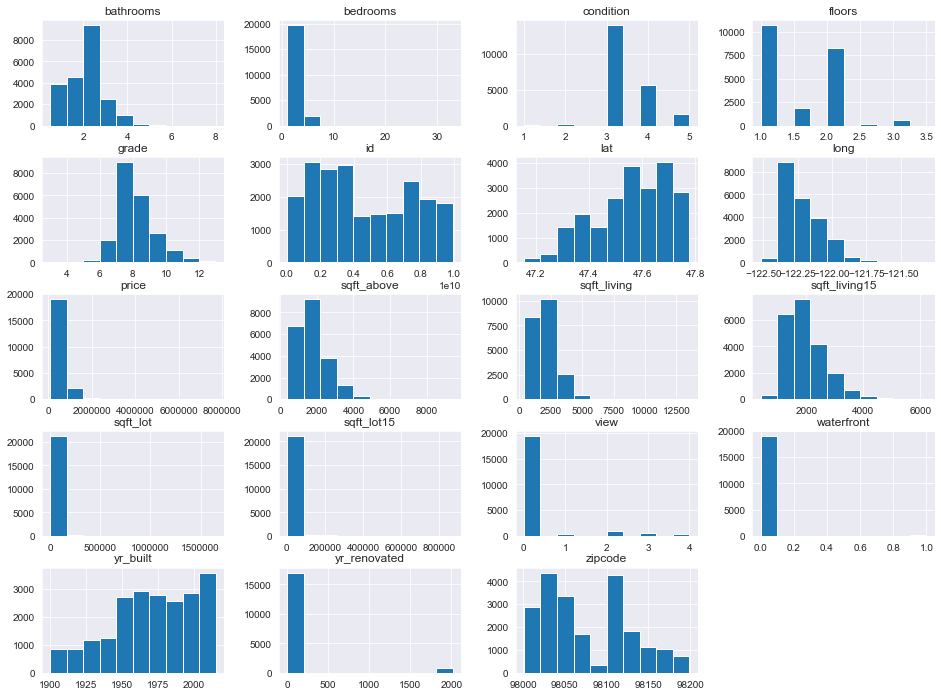

In [383]:
df.hist(figsize=(16,12));

Preliminary Model

In [529]:
y = df['price']
# Take out price, objects, and columns with null values
x = df.drop(['price', 'date', 'waterfront', 'yr_renovated', 'view'], axis=1)
#X = sm.add_constant(x)
linreg = sm.OLS(y, x).fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1701.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:11:52   Log-Likelihood:            -2.2945e+05
No. Observations:               17406   AIC:                         4.589e+05
Df Residuals:                   17385   BIC:                         4.591e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
id                 -6.561e-07   3.43e-07     -1.912      0.056   -1.33e-06    1.66e-08
bedrooms           -1.293e+04   1520.498     -8.502      0.000   -1.59e+04   -9947.129
bathrooms           2.361e+04   2528.901      9.338      0.000    1.87e+04    2.86e+04
sqft_living           61.6310      9.441      6.528      0.000      43.126      80.136
sqft_lot             -31.6310      4.731     -6.686      0.000     -40.904     -22.358
floors              2.294e+04   2857.115      8.029      0.000    1.73e+04    2.85e+04
condition           3.015e+04   1687.570     17.864      0.000    2.68e+04    3.35e+04
grade               8.601e+04   1677.708     51.269      0.000    8.27e+04    8.93e+04
sqft_above            16.1858     14.114      1.147      0.251     -11.480      43.851
sqft_basement        -27.4912     14.863     -1.850      0.064     -56.623       1.641
yr_built            2.084e+04   7674.138      2.715      0.007    5796.485    3.59e+04
zipcode             -352.9364     22.900    -15.412      0.000    -397.823    -308.049
lat                 5.597e+05   7620.911     73.443      0.000    5.45e+05    5.75e+05
long                 -7.4e+04   1.08e+04     -6.833      0.000   -9.52e+04   -5.28e+04
sqft_living15         35.7699      1.974     18.119      0.000      31.900      39.640
sqft_lot15           -19.5103      1.070    -18.227      0.000     -21.608     -17.412
reno_done           3.701e-09   1.23e-09      3.011      0.003    1.29e-09    6.11e-09
basement            3.146e+04   4122.466      7.632      0.000    2.34e+04    3.95e+04
day_of_year         -237.2550    113.143     -2.097      0.036    -459.026     -15.484
month               4564.4009   3440.805      1.327      0.185   -2179.923    1.13e+04
year               -2.126e+04   7655.070     -2.778      0.005   -3.63e+04   -6259.127
age_when_sold       -4.21e+04   1.53e+04     -2.748      0.006   -7.21e+04   -1.21e+04
yr_sold            -2.126e+04   7655.070     -2.778      0.005   -3.63e+04   -6259.127
tsf                   30.0061      4.718      6.360      0.000      20.758      39.254
tsf15                 16.2663      0.970     16.775      0.000      14.366      18.167
latest_update       2.084e+04   7674.139      2.715      0.007    5796.486    3.59e+04
time_since_updated  8.611e+04   3.07e+04      2.807      0.005     2.6e+04    1.46e+05
==============================================================================
Omnibus:                     5195.630   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26376.128
Skew:                           1.354   Prob(JB):                         0.00
Kurtosis:                       8.388   Cond. No.                     1.00e+16
==============================================================================

Preliminary Results:
    - R^2 = 0.661
    - Skew = 3.955
    - Kurtosis = 48.786
    - Low P-Values except for Sqft_above
    _ Need to Clean the data...
    
(Skewness In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical.As a general rule of thumb:

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. Kurtosis Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.)
    

# Clean Up Data

In [385]:
# We see that Waterfront, View, and Yr_Renovated have null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [386]:
# Count of rows with null values
sum([True for idx,row in df.iterrows()if any(row.isnull())])

5835

## Lets Address the Null Values

### Addressing the Waterfront data.

In [387]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [388]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [389]:
# Since only 63 rows do not have information for views I will replace it with
#  a zero since the vast majority of homes are not waterfront
df['waterfront'] = df['waterfront'].fillna(0)

In [390]:
#Check to see if NaN were replaced (Ans:Yes. 1=Waterfront, 2=Not Waterfront)
df.waterfront.unique()

array([0., 1.])

In [391]:
#1.0 = waterfront homes
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

### Addressing View

In [392]:
# What are the values represented in the View column?
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [393]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [394]:
# Since only 63 rows do not have information for views I will replace it with
#  a zero
df['view'] = df['view'].fillna(0)

In [395]:
# The NaN's were added to the 0.0 category
# The vast majority of homes have zero views
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [396]:
#Check to see if NaN was replaced
df.view.unique()

array([0., 3., 4., 2., 1.])

In [397]:
#check
df.view.isna().sum()

0

### Addressing Yr_renovated

In [398]:
# There are 3842 NaNs in this column
df.yr_renovated.isna().sum()

3842

In [399]:
# The vast majority of houses do not have a date for renovations.
# I will make the safe assumption that these houses were not renovated.
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [400]:
# Replace null values with 0
df['yr_renovated'].fillna(0, inplace = True)

In [401]:
#Check
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

-Since the vast majority of homes do not have a renovation (reno) date 
I will categorize this data as a 1 (Yes) and 2 (No) for renovations.

Feature Engineering

In [402]:
# Create a new column with a 1 if renovations are done.
df['reno_done'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_done
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [403]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

* Since yr_renovated does not have much of relationship with sales price, I will drop the column.

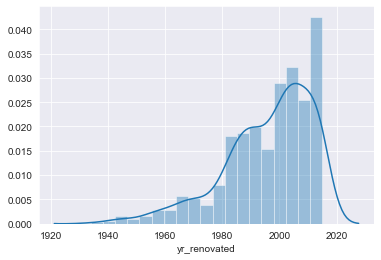

In [404]:
# Histogram of homes that have been renovated by date
reno_test = df[df['yr_renovated'] > 1]
sns.distplot(reno_test.yr_renovated);

In [405]:
# Number of categorical data yes/no to renovations
df.reno_done.value_counts()

0    20853
1      744
Name: reno_done, dtype: int64

### Addressing Sqft_basement

-Instead of null values we have '?' in the data field

In [406]:
# Aprox. 2% of the data has a '?', and 60% has a 0 value
df.sqft_basement.value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
935.0     0.000046
2850.0    0.000046
1880.0    0.000046
588.0     0.000046
295.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

In [407]:
# Replace the '?' with a 0
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)

In [408]:
#check
df.sqft_basement.value_counts()

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
4130.0        1
935.0         1
1880.0        1
2490.0        1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [409]:
# Change the 0 to a float to match the rest of the data format
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [410]:
# check
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [411]:
# A column will be added to define if there is a basement (yes=1)
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x>0 else x)

In [412]:
# check
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,reno_done,basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0.0


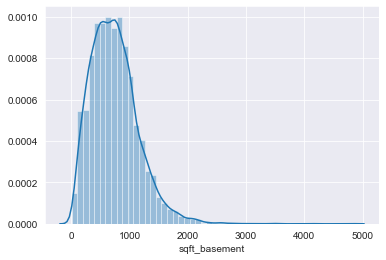

In [413]:
# Histogram to see distribution of basement sizes
basement_hist = df[df['sqft_basement']>1]
sns.distplot(basement_hist.sqft_basement);

In [414]:
# show how many homes have and do not have basements
# 7703 homes have basements
df.basement.value_counts()

0.0    13280
1.0     8317
Name: basement, dtype: int64

<font size="5"> Check Dataframe Formats</font> 

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [416]:
#Convert the date column to use in modeling later
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [417]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [418]:
#change waterfront to True or False for easier analysis
#df['waterfront'] = df['waterfront'].astype('bool')

In [419]:
#df.info()

### Remove Outlying Data

In [420]:
# I want to narrow the data I am looking at to two standard deviations (SD). 
# 2 SD will include about 95% of may data; eliminating 5% (outliers)
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (2 * iqr)
    upper_bound = q3 + (2 * iqr)
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

In [421]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

<font size="6">Exploratory Data Analysis</font> 

<font size="4">Preliminary EDA</font> 

Dataset:
    * Continuous Variables will need to be scaled and normalized
        - Price, Sqft (basement, living, lot, living15), lat, long
    * Discrete Variables can be treated as continuous
        - Bedrooms, Bathrooms, Floors, Yr_built, Yr_renovated, View
    * Categorical Variables will need to be binned and one-hot encoded         before modeling.
        - Condition, Grade, Zipcode
    * Boolean variable
        - Waterfront

In [422]:
#data represents the years 2014 and 2015
df['date'].value_counts()

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-07-27      1
2015-03-08      1
2014-11-02      1
2015-05-15      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

In [423]:
# Separate the year and month and add it to columns
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [424]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,reno_done,basement,day_of_year,month,year
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.010621,0.003495,-0.011436,-0.011572,0.009915
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,-0.053402,0.306692,0.022036,0.585241,0.082845,0.117543,0.178264,-0.011486,-0.009928,0.003727
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.017635,0.158412,-0.001794,-0.001046,-0.009949
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,-0.204786,0.024280,0.224903,0.569884,0.088303,0.046742,0.159863,0.007024,0.007543,-0.026577
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,-0.199802,0.052155,0.241214,0.756402,0.184342,0.050829,0.201198,0.011368,0.012112,-0.029014
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.005091,-0.034889,-0.002576,-0.002591,0.005628
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.003713,-0.252465,0.013619,0.014245,-0.022352
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.074267,0.039220,0.009473,0.008199,-0.005018
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.085059,0.006321,-0.077702,0.278928,0.073083,0.090480,0.176905,-0.004177,-0.005161,0.001239
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.055383,0.130542,0.021967,0.022388,-0.045898


In [425]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,reno_done,basement,day_of_year,month,year
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Feature Engineering

In [426]:
# Create column showing age of houses when they sold
df['age_when_sold'] = df['year'] - df['yr_built']
df.age_when_sold.unique()

array([ 59,  63,  82,  49,  28,  13,  19,  52,  55,  12,  50,  72,  87,
        37, 115,  36,  20,  98,  93,  46,  67,  29,  73,  99, 105,  66,
        10,  11,   9,  85,  33,  84,  81, 110,  18,  14,  30,   0,  92,
        62,  64,  34,  88,   6,  24,  60,  41,  35,  89,  25,  43,  58,
        74,  22,  51,  53,   8,  26,  75,  68,  48,  39, 104,  31, 114,
         4,  69,  65,  90,  27, 101,  47,  54, 109,   7,  61,  15,  38,
        16, 113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77,
        76, 107,  40,  57, 102,  17,  71,   1,  23,  91,  42,  95,   2,
        32,   3,  56,  70,  44, 112,   5,  80,  83, 106, 108,  79,  -1])

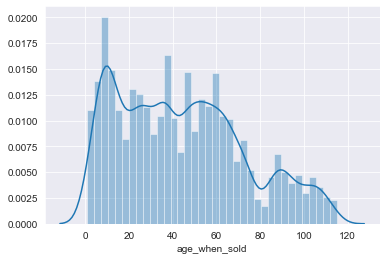

In [427]:
# Check to see the distribution of the ages of the houses sold
HouseAge_hist = df[df['age_when_sold']>0]
sns.distplot(HouseAge_hist.age_when_sold);

What is the year the houses sold?

In [428]:
# Create yr_sold column
df['yr_sold'] = df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,reno_done,basement,day_of_year,month,year,age_when_sold,yr_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,-122.257,1340,5650,0,0.0,286,10,2014,59,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,-122.319,1690,7639,1,1.0,343,12,2014,63,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,-122.233,2720,8062,0,0.0,56,2,2015,82,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,-122.393,1360,5000,0,1.0,343,12,2014,49,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,-122.045,1800,7503,0,0.0,49,2,2015,28,2015


Create columns that have the total square feet 
total square foot (tsf) = interior + lot size

In [429]:
# Create a total square foot (tsf)
df['tsf'] = df['sqft_living'] + df['sqft_lot']

In [430]:
# Create a total square foot for 15 neighbors (tsf15)
df['tsf15'] = df['sqft_living15'] + df['sqft_lot15']

When was the house last updated?
latest_update = larger number of yr_build and yr_renovated

In [431]:
# Create latest_update column
df['latest_update'] = np.nan
df.loc[df['yr_renovated'] > df['yr_built'], 'latest_update'] = df['yr_renovated']
df.loc[df['yr_renovated'] <= df['yr_built'], 'latest_update'] = df['yr_built']  
#check
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,reno_done,basement,day_of_year,month,year,age_when_sold,yr_sold,tsf,tsf15,latest_update
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0.0,286,10,2014,59,2014,6830,6990,1955.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1,1.0,343,12,2014,63,2014,9812,9329,1991.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0.0,56,2,2015,82,2015,10770,10782,1933.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,1.0,343,12,2014,49,2014,6960,6360,1965.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0.0,49,2,2015,28,2015,9760,9303,1987.0


How long has it been since the house was renovated when it sold?
time_since_renovated = yr_sold - latest_update

In [432]:
## Create time_since_updated column
df['time_since_updated'] = df['yr_sold'] - df['latest_update']
df['time_since_updated'].values[df['time_since_updated'].values <= 0] = 0.1

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  21597 non-null  int64         
 1   date                21597 non-null  datetime64[ns]
 2   price               21597 non-null  float64       
 3   bedrooms            21597 non-null  int64         
 4   bathrooms           21597 non-null  float64       
 5   sqft_living         21597 non-null  int64         
 6   sqft_lot            21597 non-null  int64         
 7   floors              21597 non-null  float64       
 8   waterfront          21597 non-null  float64       
 9   view                21597 non-null  float64       
 10  condition           21597 non-null  int64         
 11  grade               21597 non-null  int64         
 12  sqft_above          21597 non-null  int64         
 13  sqft_basement       21597 non-null  float64   

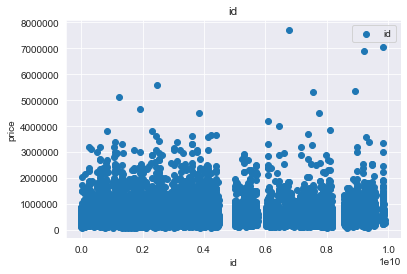

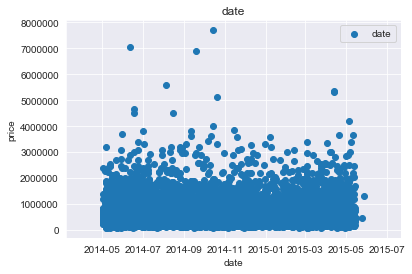

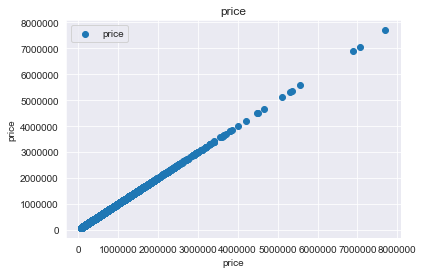

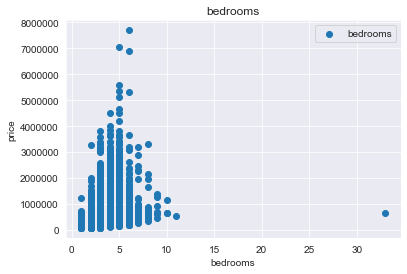

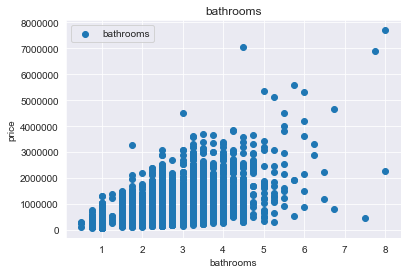

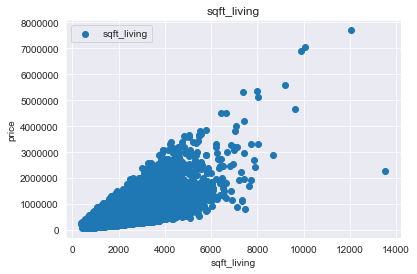

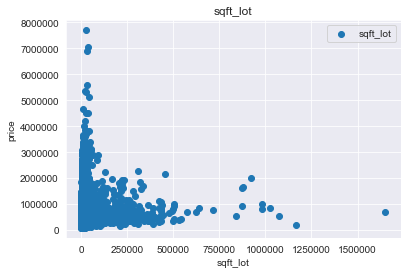

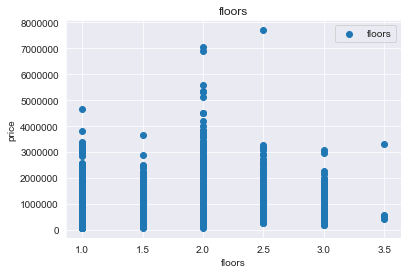

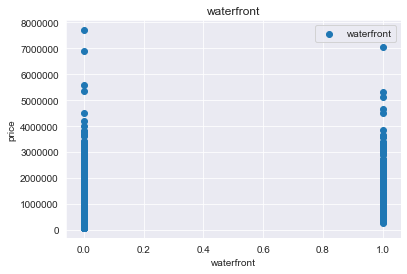

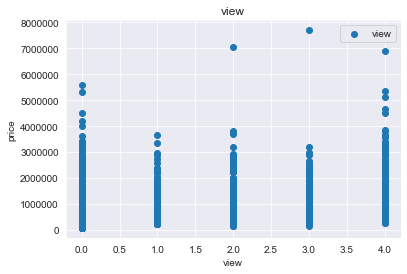

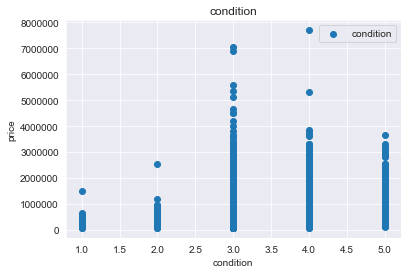

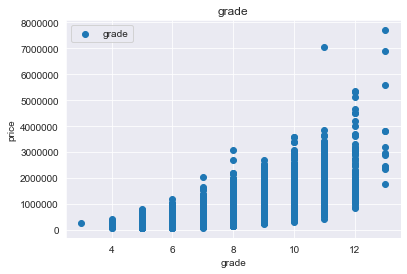

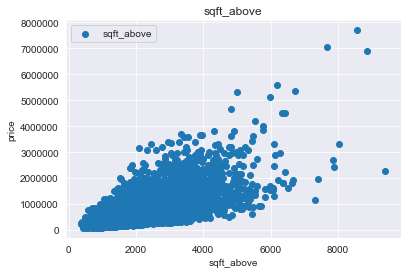

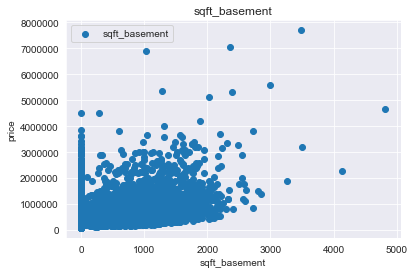

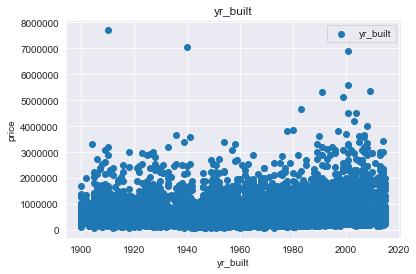

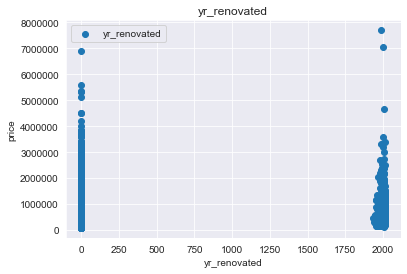

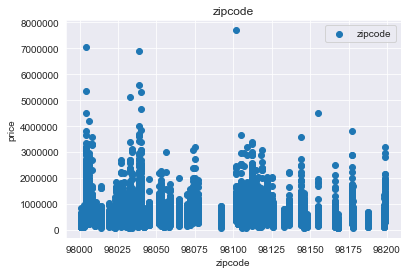

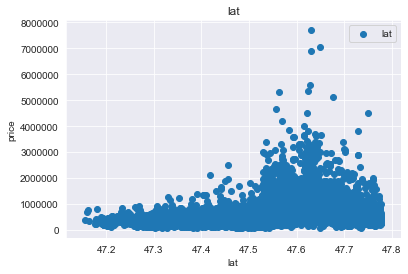

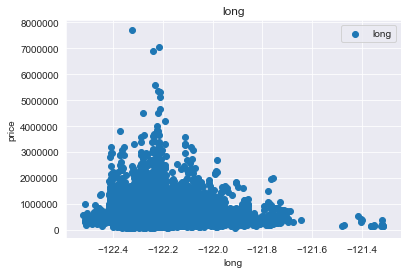

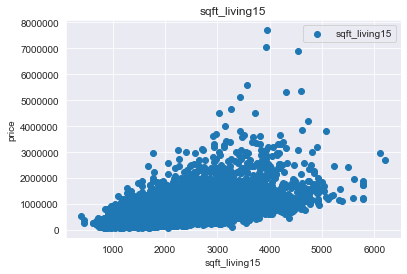

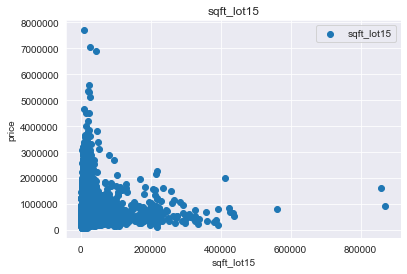

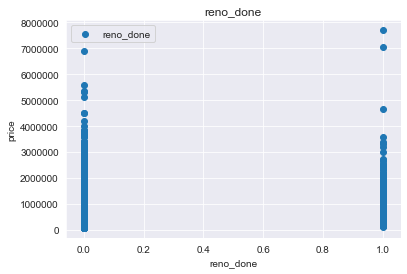

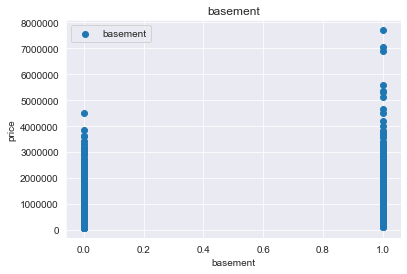

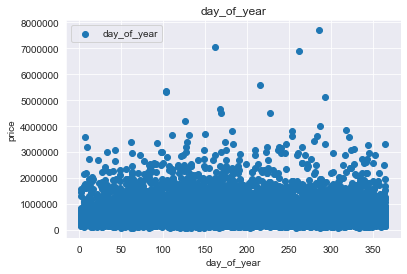

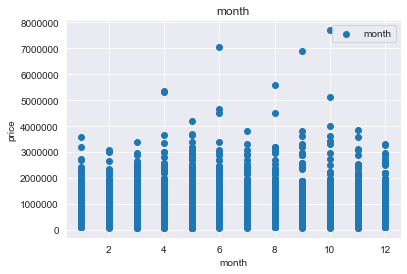

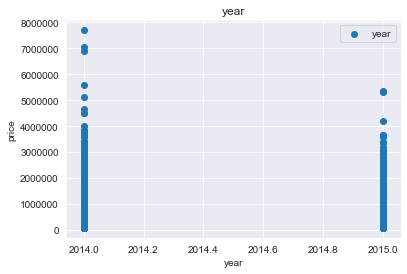

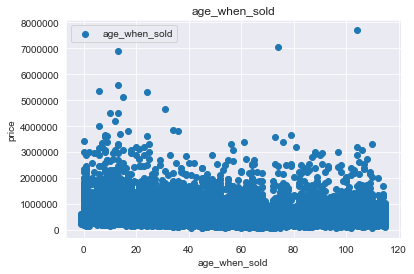

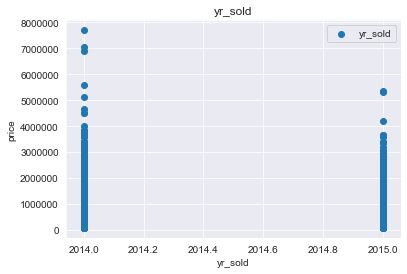

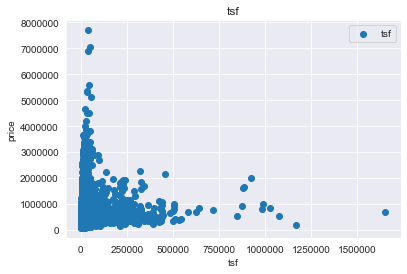

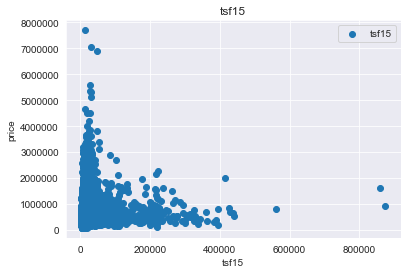

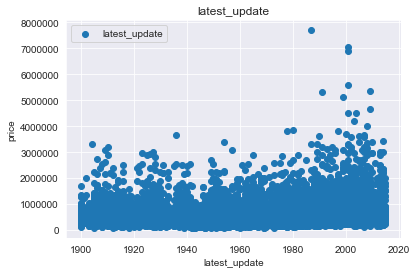

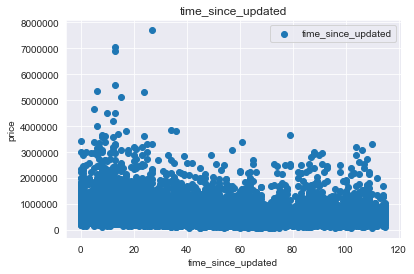

In [434]:
# Check linearity assumption with scatter plots
for col in df.columns: 
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

In [435]:
# From these graphs I will choose which data to keep and drop (df_narrow)
df_narrow1 = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'yr_sold',
                     'latest_update'], axis=1)
df_narrow1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'reno_done', 'basement', 'day_of_year', 'month', 'year',
       'age_when_sold', 'tsf', 'tsf15', 'time_since_updated'],
      dtype='object')

In [436]:
df_narrow1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,reno_done,basement,day_of_year,month,year,age_when_sold,tsf,tsf15,time_since_updated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,...,12758.283512,0.034449,0.38510,184.300042,6.573969,2014.322962,43.323286,1.717973e+04,14744.903829,41.381053
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,...,27274.441950,0.182384,0.48663,94.737427,3.115061,0.467619,29.377285,4.158172e+04,27408.470616,28.946256
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.000000,0.00000,2.000000,1.000000,2014.000000,-1.000000,1.423000e+03,1721.000000,0.100000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,0.000000,0.00000,110.000000,4.000000,2014.000000,18.000000,7.036000e+03,6979.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,0.000000,0.00000,178.000000,6.000000,2014.000000,40.000000,9.575000e+03,9460.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10083.000000,0.000000,1.00000,262.000000,9.000000,2015.000000,63.000000,1.299500e+04,12232.000000,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,1.000000,1.00000,365.000000,12.000000,2015.000000,115.000000,1.652659e+06,874620.000000,115.000000


Now I will address the outliers 

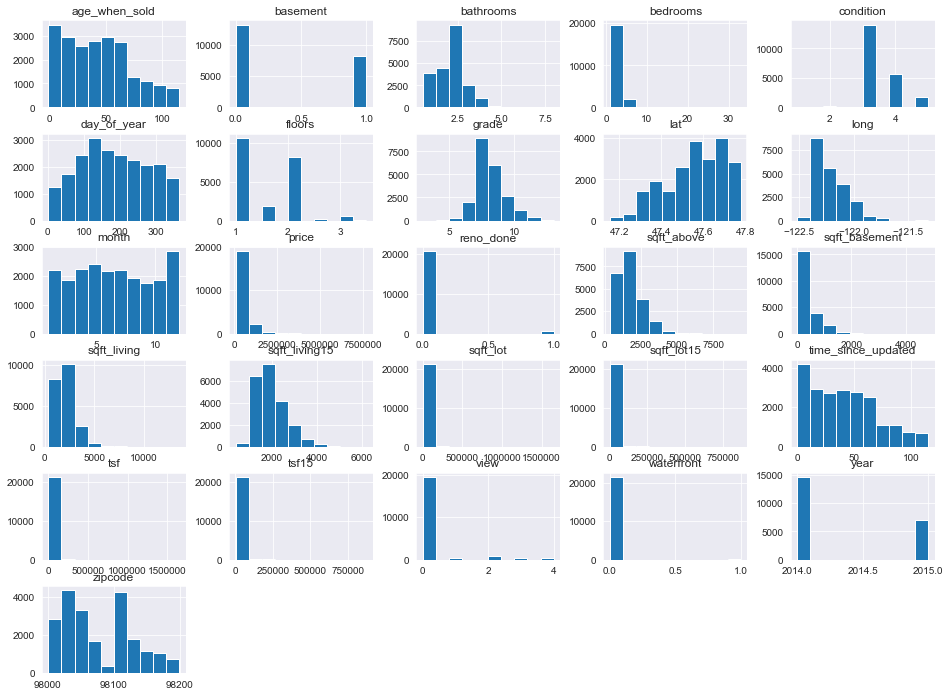

In [437]:
df_narrow1.hist(figsize=(16,12));

Looking at the histogram...will need to address the catagorical data

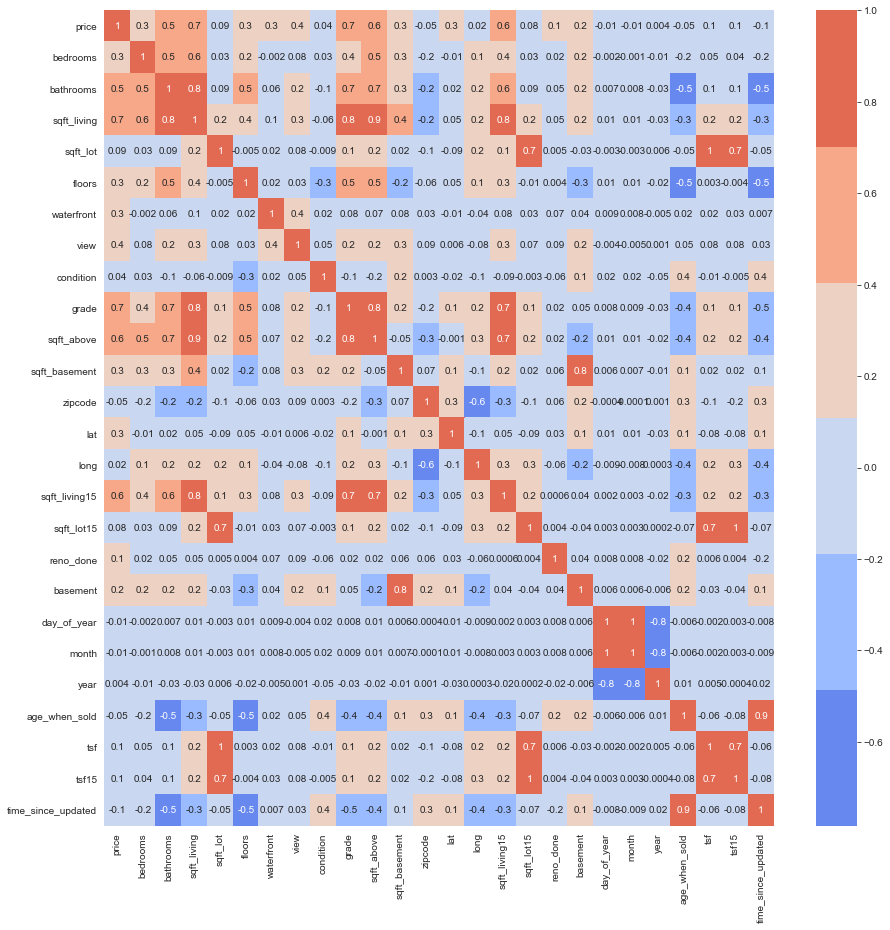

In [438]:
# Heatmap of the covariance
corr = df_narrow1.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Columns with High Correlation to Price:
    - Grade 
    - Sqft_living
Columns Correlated with Each Other:
    - Sqft_living
    - Sqft_living15
    - Grade
    - Sqft_above
    - Bathrooms

Remove Outliers

In [439]:
import scipy.stats as stats
for col in df_narrow1:
    df.drop(df.loc[np.abs(stats.zscore(df[col]))>3].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17406 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  17406 non-null  int64         
 1   date                17406 non-null  datetime64[ns]
 2   price               17406 non-null  float64       
 3   bedrooms            17406 non-null  int64         
 4   bathrooms           17406 non-null  float64       
 5   sqft_living         17406 non-null  int64         
 6   sqft_lot            17406 non-null  int64         
 7   floors              17406 non-null  float64       
 8   waterfront          17406 non-null  float64       
 9   view                17406 non-null  float64       
 10  condition           17406 non-null  int64         
 11  grade               17406 non-null  int64         
 12  sqft_above          17406 non-null  int64         
 13  sqft_basement       17406 non-null  float64   

Addressing Categorical Data

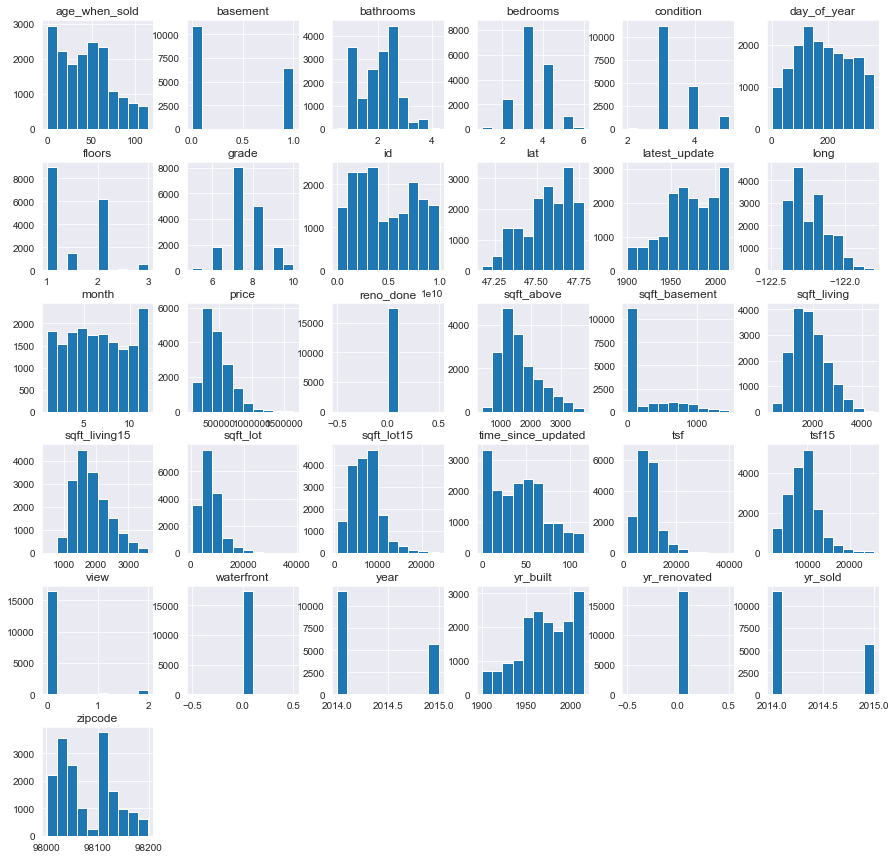

In [440]:
df.hist(figsize=(15,15));

In [441]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'reno_done', 'basement',
       'day_of_year', 'month', 'year', 'age_when_sold', 'yr_sold', 'tsf',
       'tsf15', 'latest_update', 'time_since_updated'],
      dtype='object')

In [442]:
# # Let's look at a heatmap of the covariance
# corr = df_after_columns_dropped.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('coolwarm'))
# plt.show()

In [443]:
df_narrow1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,reno_done,basement,day_of_year,month,year,age_when_sold,tsf,tsf15,time_since_updated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,...,12758.283512,0.034449,0.38510,184.300042,6.573969,2014.322962,43.323286,1.717973e+04,14744.903829,41.381053
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,...,27274.441950,0.182384,0.48663,94.737427,3.115061,0.467619,29.377285,4.158172e+04,27408.470616,28.946256
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,0.000000,0.00000,2.000000,1.000000,2014.000000,-1.000000,1.423000e+03,1721.000000,0.100000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,0.000000,0.00000,110.000000,4.000000,2014.000000,18.000000,7.036000e+03,6979.000000,16.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,0.000000,0.00000,178.000000,6.000000,2014.000000,40.000000,9.575000e+03,9460.000000,37.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10083.000000,0.000000,1.00000,262.000000,9.000000,2015.000000,63.000000,1.299500e+04,12232.000000,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,1.000000,1.00000,365.000000,12.000000,2015.000000,115.000000,1.652659e+06,874620.000000,115.000000


There are some outliers that I still need to address more closely.

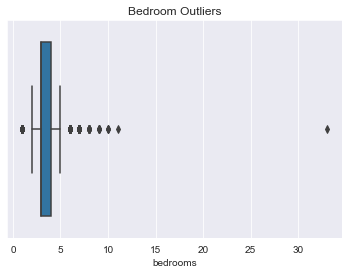

In [444]:
# Bedroom
sns.boxplot(x=df_narrow1['bedrooms']).set_title('Bedroom Outliers') ;

In [445]:
# remove those outliers
df_narrow1 = remove_outlier(df_narrow1, 'bedrooms')

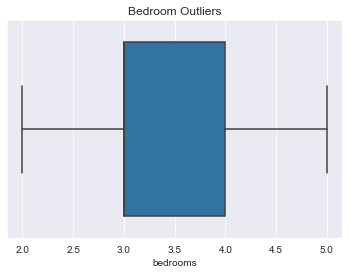

In [446]:
# boxplot after outliers removed
sns.boxplot(x=df_narrow1['bedrooms']).set_title('Bedroom Outliers') ;

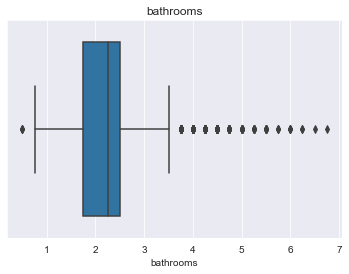

In [447]:
# Bathroom Outliers
sns.boxplot(x=df_narrow1['bathrooms']).set_title('bathrooms') ;

In [448]:
# remove those outliers
df_narrow1 = remove_outlier(df_narrow1, 'bathrooms')

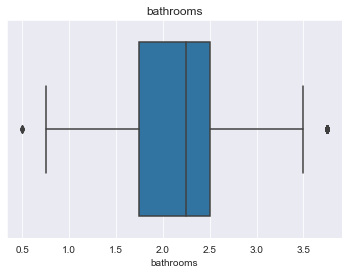

In [449]:
# boxplot after outliers removed
sns.boxplot(x=df_narrow1['bathrooms']).set_title('bathrooms') ;

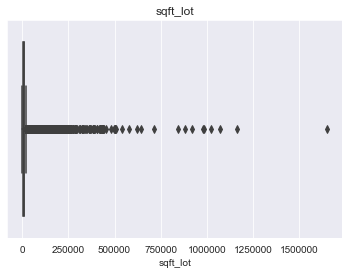

In [450]:
# Lot Square Footage Outliers
sns.boxplot(x=df_narrow1['sqft_lot']).set_title('sqft_lot') ;

In [451]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'sqft_lot')

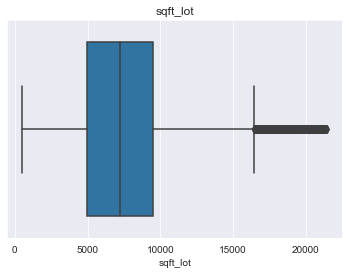

In [452]:
# Lot Square Footage Outliers Removed
sns.boxplot(x=df_narrow1['sqft_lot']).set_title('sqft_lot') ;

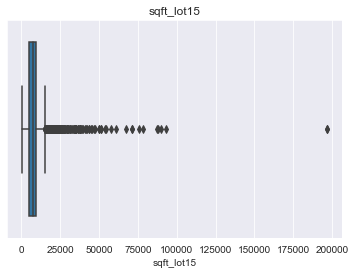

In [453]:
# Neighbors Lot Square Footage Outliers
sns.boxplot(x=df_narrow1['sqft_lot15']).set_title('sqft_lot15') ;

In [454]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'sqft_lot15')

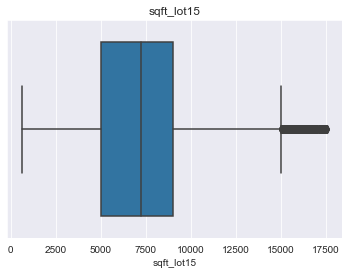

In [455]:
# Neighbors Lot Square Footage Outliers
sns.boxplot(x=df_narrow1['sqft_lot15']).set_title('sqft_lot15') ;

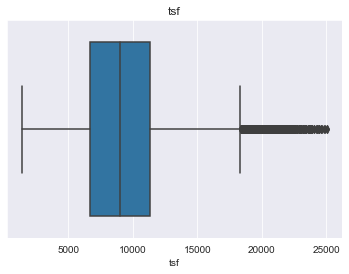

In [456]:
# Total Square Footage of the House Outliers
sns.boxplot(x=df_narrow1['tsf']).set_title('tsf') ;

In [457]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'tsf')

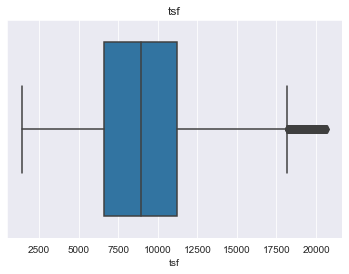

In [458]:
# Age of the House When Sold Outliers
sns.boxplot(x=df_narrow1['tsf']).set_title('tsf') ;

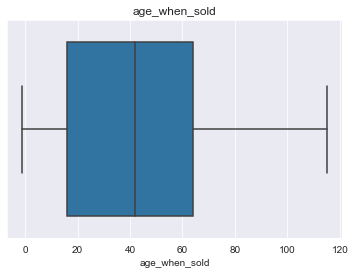

In [459]:
# Age of the House When Sold Outliers
sns.boxplot(x=df_narrow1['age_when_sold']).set_title('age_when_sold') ;

In [460]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'age_when_sold')

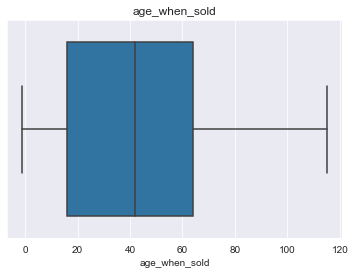

In [461]:
# Age of the House When Sold Outliers Removed
sns.boxplot(x=df_narrow1['age_when_sold']).set_title('age_when_sold') ;

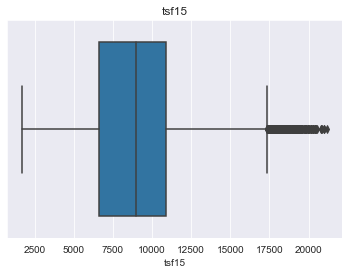

In [462]:
# Neighbors Total Square Footage of Houses Outliers
sns.boxplot(x=df_narrow1['tsf15']).set_title('tsf15') ;

In [463]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'tsf15')

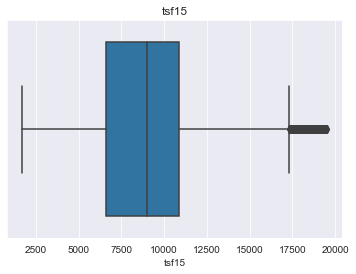

In [464]:
# Neighbors Total Square Footage of Houses Outliers Removed
sns.boxplot(x=df_narrow1['tsf15']).set_title('tsf15') ;

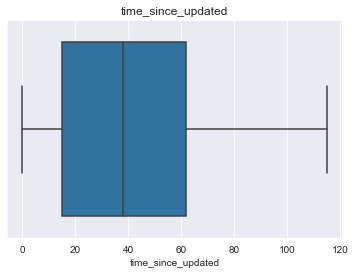

In [465]:
# Time between the last update and when it was sold
sns.boxplot(x=df_narrow1['time_since_updated']).set_title('time_since_updated') ;

In [466]:
# remove the outliers
df_narrow1 = remove_outlier(df_narrow1, 'time_since_updated')

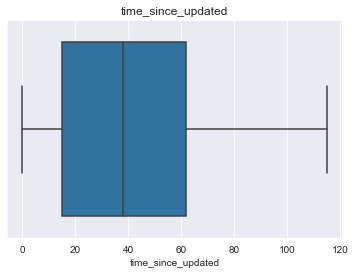

In [467]:
# Outliers removed
sns.boxplot(x=df_narrow1['time_since_updated']).set_title('time_since_updated') ;

In [468]:
df_narrow1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,reno_done,basement,day_of_year,month,year,age_when_sold,tsf,tsf15,time_since_updated
count,1.811500e+04,18115.000000,18115.00000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,...,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000,18115.000000
mean,4.985594e+05,3.307646,2.04194,1943.105437,7171.735799,1.488049,0.002484,0.181949,3.411593,7.534695,...,7054.343969,0.030748,0.384212,184.050676,6.564836,2014.326359,43.914712,9114.841237,8944.662821,42.080834
std,2.805936e+05,0.792426,0.68747,752.214321,3389.356180,0.545726,0.049780,0.662914,0.650764,1.027741,...,3048.106000,0.172639,0.486422,94.933649,3.121908,0.468893,30.069565,3628.214308,3272.435570,29.678810
min,7.800000e+04,2.000000,0.50000,520.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,...,651.000000,0.000000,0.000000,2.000000,1.000000,2014.000000,-1.000000,1452.000000,1721.000000,0.100000
25%,3.125000e+05,3.000000,1.50000,1390.000000,4810.500000,1.000000,0.000000,0.000000,3.000000,7.000000,...,4967.500000,0.000000,0.000000,109.000000,4.000000,2014.000000,16.000000,6630.000000,6605.000000,15.000000
50%,4.349000e+05,3.000000,2.00000,1820.000000,7172.000000,1.000000,0.000000,0.000000,3.000000,7.000000,...,7200.000000,0.000000,0.000000,178.000000,6.000000,2014.000000,42.000000,8960.000000,8985.000000,38.000000
75%,6.050000e+05,4.000000,2.50000,2380.000000,9176.000000,2.000000,0.000000,0.000000,4.000000,8.000000,...,8894.500000,0.000000,1.000000,262.000000,9.000000,2015.000000,64.000000,11220.000000,10890.000000,62.000000
max,3.650000e+06,5.000000,3.75000,7350.000000,19703.000000,3.500000,1.000000,4.000000,5.000000,13.000000,...,17550.000000,1.000000,1.000000,365.000000,12.000000,2015.000000,115.000000,20660.000000,19509.000000,115.000000


Transform Categorical Variables

-Create Bins

In [469]:
df_bins = df_narrow1

In [470]:
# Look at the Grades of the houses
df['grade'].value_counts()

7     8051
8     5048
6     1823
9     1810
10     481
5      193
Name: grade, dtype: int64

In [471]:
bins = [5,6,7,8,9,10]
grade_bins = pd.cut(df_narrow1['grade'], bins)
grade_bins = grade_bins.cat.as_unordered()
grade_bins.head()

0    (6, 7]
1    (6, 7]
2    (5, 6]
3    (6, 7]
4    (7, 8]
Name: grade, dtype: category
Categories (5, interval[int64]): [(5, 6], (6, 7], (7, 8], (8, 9], (9, 10]]

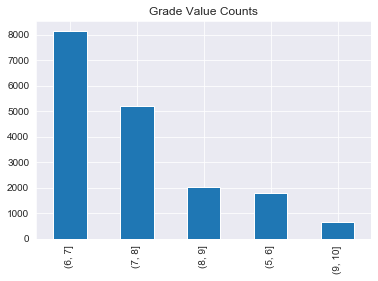

In [472]:
# check
grade_bins.value_counts().plot(kind='bar').set_title('Grade Value Counts') ;

-Condition

In [473]:
df['condition'].value_counts()

3    11193
4     4661
5     1423
2      129
Name: condition, dtype: int64

In [474]:
bins = [2,3,4,5]
condition_bins = pd.cut(df_narrow1['condition'], bins)
condition_bins = condition_bins.cat.as_unordered()
condition_bins.head()

0    (2, 3]
1    (2, 3]
2    (2, 3]
3    (4, 5]
4    (2, 3]
Name: condition, dtype: category
Categories (3, interval[int64]): [(2, 3], (3, 4], (4, 5]]

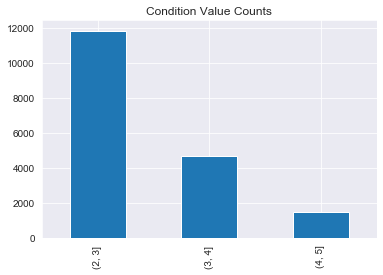

In [475]:
# check
condition_bins.value_counts().plot(kind='bar').set_title('Condition Value Counts') ;

Set up Dummy Variables for the Bins

In [476]:
grade_dummies = pd.get_dummies(grade_bins, prefix='grade',
                              drop_first=True)
condition_dummies = pd.get_dummies(condition_bins, 
                                   prefix='condition', 
                                   drop_first=True)

In [477]:
# Drop the original column and put in our dummy column

df_bins = df_bins.drop(['condition', 'grade'], axis=1)
df_bins = pd.concat([df_bins, condition_dummies, grade_dummies], axis=1)
# check
df_bins.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,age_when_sold,tsf,tsf15,time_since_updated,"condition_(3, 4]","condition_(4, 5]","grade_(6, 7]","grade_(7, 8]","grade_(8, 9]","grade_(9, 10]"
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1180,0.0,...,59,6830,6990,59.0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400.0,...,63,9812,9329,23.0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,0.0,...,82,10770,10782,82.0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910.0,...,49,6960,6360,49.0,0,1,1,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0.0,...,28,9760,9303,28.0,0,0,0,1,0,0


In [478]:
# check
df_narrow1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,reno_done,basement,day_of_year,month,year,age_when_sold,tsf,tsf15,time_since_updated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,5650,0,0.0,286,10,2014,59,6830,6990,59.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,7639,1,1.0,343,12,2014,63,9812,9329,23.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,8062,0,0.0,56,2,2015,82,10770,10782,82.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,5000,0,1.0,343,12,2014,49,6960,6360,49.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,7503,0,0.0,49,2,2015,28,9760,9303,28.0


Question 1: What affect does condition have with the price of the house?

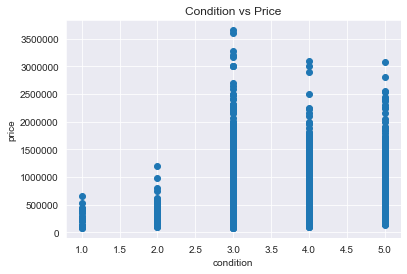

In [479]:
plt.scatter(df_narrow1['condition'], df_narrow1['price'], cmap='coolwarm')
plt.title('Condition vs Price')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

In [480]:
df['condition'].value_counts()

3    11193
4     4661
5     1423
2      129
Name: condition, dtype: int64

From the King County Assessment Roll
Condition: Relative to Age and Grade
1= Poor Many repairs needed. Showing serious deterioration.
2= Fair Some repairs needed immediately. Much deferred maintenance.
3= Average Depending upon age of improvement; normal amount of upkeep for the age
of the home.
4= Good Condition above the norm for the age of the home. Indicates extra attention
and care has been taken to maintain.
5= Very Good Excellent maintenance and updating on home. Not a total renovation.

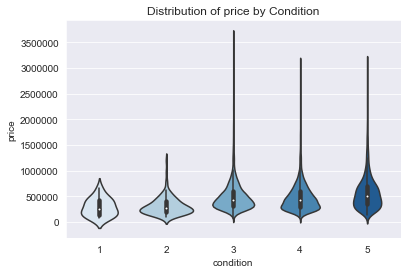

In [481]:
# Violin plot of condition vs price
sns.violinplot(x=df_narrow1['condition'], y=df_narrow1['price'], 
               palette="Blues").set_title('Distribution of price by Condition') ;

Question 2: Does Location affect house prices?

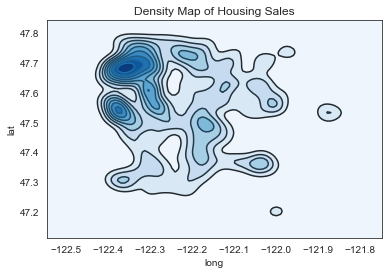

In [496]:
# 2D density plot
sns.set_style("white")
sns.kdeplot(df.long, df.lat)
 
# Some features are characteristic of 2D: 
sns.kdeplot(df.long, df.lat, cmap="Blues", shade=True, shade_lowest=True)
plt.title('Density Map of Housing Sales')
plt.show()

In [498]:
# Build cluster map to show density of house sales
mc = folium.Map([47.5112, -122.257], zoom_start=10.5, 
                min_lat=min_lat, max_lat=max_lat, 
                min_lon=min_lon, max_lon=max_lon)
locations = list(zip(df_narrow1.lat, df_narrow1.long))

icons = [folium.Icon(prefix="fa") for _ in range(len(locations))]

cluster = MarkerCluster(locations=locations, icons=icons, 
                        name='Cluster Map of Housing Sales')
mc.add_child(cluster)
mc.save('color_map_clusters.html')

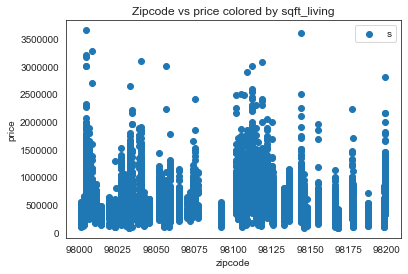

In [503]:
# Look at prices by zipcode
plt.scatter(df_narrow1['zipcode'], df_narrow1['price'], 
            cmap='viridis')
plt.title('Zipcode vs price colored by sqft_living')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.legend('sqft_living')
plt.show()

In [482]:
# m = folium.Map([df_narrow1['lat'].mean(), df_narrow1['long'].mean()], 
#                zoom_start=11)

In [485]:
df_narrow1['price'].describe()

count    1.811500e+04
mean     4.985594e+05
std      2.805936e+05
min      7.800000e+04
25%      3.125000e+05
50%      4.349000e+05
75%      6.050000e+05
max      3.650000e+06
Name: price, dtype: float64

In [515]:
df_narrow1['tsf'].describe()

count    18115.000000
mean      9114.841237
std       3628.214308
min       1452.000000
25%       6630.000000
50%       8960.000000
75%      11220.000000
max      20660.000000
Name: tsf, dtype: float64

Question 3: What is the effect of house size on the price?

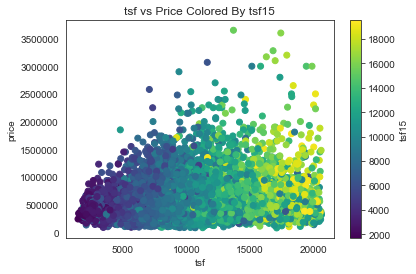

In [511]:
plt.scatter(df_narrow1['tsf'], df_narrow1['price'], label=None,
            c=df_narrow1['tsf15'],
            cmap='viridis')
plt.title('tsf vs Price Colored By tsf15')
plt.xlabel('tsf')
plt.ylabel('price')
plt.colorbar(label='tsf15')
plt.show()

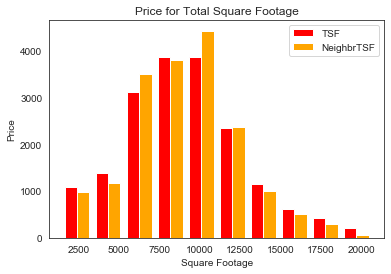

In [522]:

totalSF = df_narrow1['tsf']
legend = ['TSF', 'NeighbrTSF']
totalSF15 = df_narrow1['tsf15']
plt.hist([totalSF, totalSF15], color=['red', 'orange'])
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend(legend)
#plt.xticks(range(14, 21))
#plt.yticks(range(7, 37))
plt.title('Price for Total Square Footage')
plt.show()

In [ ]:
Create a Linear Regression Model

In [524]:
# Preparing the data
X = df_narrow1.drop(['price'], axis=1)
#X = sm.add_constant(x)
y = df_narrow1[['price']]

# Splitting the dataset into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 10)

linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              7267.
Date:                Sun, 26 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:30:41   Log-Likelihood:                     -1.6916e+05
No. Observations:               12680   AIC:                                  3.384e+05
Df Residuals:                   12657   BIC:                                  3.385e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
bedrooms           -2.493e+04   2212.408    -11.269      0.000   -2.93e+04   -2.06e+04
bathrooms           1.852e+04   3477.969      5.324      0.000    1.17e+04    2.53e+04
sqft_living           71.0024     13.118      5.413      0.000      45.289      96.716
sqft_lot             -37.1939      6.582     -5.651      0.000     -50.096     -24.292
floors              1.245e+04   4007.594      3.106      0.002    4593.590    2.03e+04
waterfront          5.917e+05   2.97e+04     19.908      0.000    5.33e+05     6.5e+05
view                5.156e+04   2320.725     22.219      0.000     4.7e+04    5.61e+04
condition           3.011e+04   2339.806     12.868      0.000    2.55e+04    3.47e+04
grade               9.872e+04   2256.035     43.757      0.000    9.43e+04    1.03e+05
sqft_above            42.7031     19.625      2.176      0.030       4.235      81.171
sqft_basement          2.9994     20.397      0.147      0.883     -36.982      42.981
zipcode             -485.6693     31.320    -15.507      0.000    -547.061    -424.278
lat                 5.608e+05   1.07e+04     52.530      0.000     5.4e+05    5.82e+05
long                -1.07e+05   1.37e+04     -7.819      0.000   -1.34e+05   -8.02e+04
sqft_living15         23.0753      2.604      8.860      0.000      17.970      28.180
sqft_lot15           -13.4258      1.482     -9.058      0.000     -16.331     -10.520
reno_done           7.404e+04   2.12e+04      3.500      0.000    3.26e+04    1.16e+05
basement            2.067e+04   5409.818      3.821      0.000    1.01e+04    3.13e+04
day_of_year         -333.7898    155.529     -2.146      0.032    -638.649     -28.930
month               8179.2410   4729.938      1.729      0.084   -1092.155    1.75e+04
year                3553.2925   1357.011      2.618      0.009     893.345    6213.240
age_when_sold       2110.6209    331.254      6.372      0.000    1461.312    2759.929
tsf                   33.8085      6.563      5.151      0.000      20.943      46.674
tsf15                  9.6494      1.278      7.550      0.000       7.144      12.155
time_since_updated   317.2247    335.817      0.945      0.345    -341.027     975.477
==============================================================================
Omnibus:                     6922.953   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140556.557
Skew:                           2.188   Prob(JB):                         0.00
Kurtosis:                      18.713   Cond. No.                     1.23e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the er

Validate Model

In [526]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12680 5435 12680 5435


In [527]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    2.261578e+10
dtype: float64
Test Mean Squarred Error: price    2.676611e+10
dtype: float64


There is not a big difference between the test and train mean. Good!

Get RMSE

In [528]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Root Mean Squarred Error:', sqrt(mse_train))
print('Test Root Mean Squarred Error:', sqrt(mse_test))

Train Root Mean Squarred Error: 150385.4448073887
Test Root Mean Squarred Error: 163603.52172204255


Analysis

The variables that I focused on in this model took into consideration location, condition of the house, the size. To get to this level of analysis I had to make sure the data was cleaned and in the proper data type. This allowed me to look at the distributions of all of the variables. I made sure to differentiate between the catagorical and continuous variables before continuing further analysis. Next, I looked at an initial model to get a baseline of the data. 